<h1>Exploratory Data Analysis of Cryptocurrency Markets

<h3>Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns 
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

<h3>Loading Dataset

In [8]:
data=pd.read_excel(r"C:\Users\Atharv\Downloads\crypto_historical_365days.xlsx")

In [9]:
data

,coin_id,coin_name,symbol,market_cap_rank,timestamp,date,price,market_cap,volume,daily_return,price_ma7,price_ma30,volatility_7d,cumulative_return,month
0,aave,Aave,AAVE,46,2024-12-04 00:00:00,2024-12-04,241.886714,3.633154e+09,1.181708e+09,NaN,241.886714,241.886714,NaN,NaN,2024-12
1,aave,Aave,AAVE,46,2024-12-05 00:00:00,2024-12-05,255.966610,3.841768e+09,1.191179e+09,5.820864,248.926662,248.926662,NaN,5.820864,2024-12
2,aave,Aave,AAVE,46,2024-12-06 00:00:00,2024-12-06,248.589404,3.725870e+09,8.706666e+08,-2.882097,248.814243,248.814243,6.153922,2.771004,2024-12
3,aave,Aave,AAVE,46,2024-12-07 00:00:00,2024-12-07,281.755167,4.226339e+09,1.120551e+09,13.341583,257.049474,257.049474,8.119016,16.482283,2024-12
4,aave,Aave,AAVE,46,2024-12-08 00:00:00,2024-12-08,282.398618,4.241226e+09,6.553344e+08,0.228372,262.119303,262.119303,7.120498,16.748297,2024-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33359,zcash,Zcash,ZEC,33,2025-11-30 00:00:00,2025-11-30,458.814571,7.536543e+09,6.362414e+08,1.145672,504.176915,537.890830,7.126728,521.612071,2025-11
33360,zcash,Zcash,ZEC,33,2025-12-01 00:00:00,2025-12-01,430.525952,7.080314e+09,7.113468e+08,-6.165589,483.832319,538.703114,4.817621,483.286028,2025-12
33361,zcash,Zcash,ZEC,33,2025-12-02 00:00:00,2025-12-02,345.486402,5.676282e+09,1.614066e+09,-19.752479,458.969507,536.453314,7.590055,368.072576,2025-12
33362,zcash,Zcash,ZEC,33,2025-12-03 00:00:00,2025-12-03,315.900215,5.186980e+09,1.395002e+09,-8.563633,431.413186,533.051328,7.512955,327.988559,2025-12


<h3>Understanding the Dataset

<h3>EDA(Exploratory Data Analysis)

In [4]:
data.shape

(33364, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33364 entries, 0 to 33363
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   coin_id            33364 non-null  object        
 1   coin_name          33364 non-null  object        
 2   symbol             33364 non-null  object        
 3   market_cap_rank    33364 non-null  int64         
 4   timestamp          33364 non-null  datetime64[ns]
 5   date               33364 non-null  datetime64[ns]
 6   price              33364 non-null  float64       
 7   market_cap         33364 non-null  float64       
 8   volume             33364 non-null  float64       
 9   daily_return       33264 non-null  float64       
 10  price_ma7          33364 non-null  float64       
 11  price_ma30         33364 non-null  float64       
 12  volatility_7d      33164 non-null  float64       
 13  cumulative_return  33264 non-null  float64       
 14  month 

In [6]:
data.describe()

,market_cap_rank,timestamp,date,price,market_cap,volume,daily_return,price_ma7,price_ma30,volatility_7d,cumulative_return
count,33364.000000,33364,33364,33364.000000,3.336400e+04,3.336400e+04,33264.000000,33364.000000,33364.000000,33164.000000,33264.000000
mean,49.647554,2025-06-10 17:31:03.025116928,2025-06-10 17:27:35.197218816,4935.370689,3.740995e+10,2.267570e+09,0.006311,4938.045186,4950.016427,3.341479,-0.954928
min,1.000000,2024-12-04 00:00:00,2024-12-04 00:00:00,0.000002,0.000000e+00,0.000000e+00,-76.575558,0.000002,0.000002,0.000000,-87.110714
25%,24.000000,2025-03-12 00:00:00,2025-03-12 00:00:00,0.999408,1.484588e+09,2.355836e+07,-1.614341,0.999587,0.999680,1.157136,-44.110582
50%,49.000000,2025-06-13 00:00:00,2025-06-13 00:00:00,3.373112,3.059569e+09,1.239228e+08,0.000000,3.382747,3.548318,2.928408,-11.790919
75%,75.000000,2025-09-11 00:00:00,2025-09-11 00:00:00,190.019842,8.223864e+09,4.350004e+08,1.317147,191.887314,196.344415,4.582064,1.036534
max,101.000000,2025-12-03 19:25:43,2025-12-03 00:00:00,125397.347055,2.486073e+12,2.794751e+11,346.177143,122782.867695,117507.380826,139.182855,4747.333288
std,29.297393,NaN,NaN,21026.134092,2.170265e+11,1.165108e+10,4.968284,21030.766879,21062.153924,3.769143,198.786656


In [7]:
data.dtypes

coin_id                      object
coin_name                    object
symbol                       object
market_cap_rank               int64
timestamp            datetime64[ns]
date                 datetime64[ns]
price                       float64
market_cap                  float64
volume                      float64
daily_return                float64
price_ma7                   float64
price_ma30                  float64
volatility_7d               float64
cumulative_return           float64
month                        object
dtype: object

In [8]:
data.columns

Index(['coin_id', 'coin_name', 'symbol', 'market_cap_rank', 'timestamp',
       'date', 'price', 'market_cap', 'volume', 'daily_return', 'price_ma7',
       'price_ma30', 'volatility_7d', 'cumulative_return', 'month'],
      dtype='object')

In [9]:
data.head()

,coin_id,coin_name,symbol,market_cap_rank,timestamp,date,price,market_cap,volume,daily_return,price_ma7,price_ma30,volatility_7d,cumulative_return,month
0,aave,Aave,AAVE,46,2024-12-04,2024-12-04,241.886714,3.633154e+09,1.181708e+09,NaN,241.886714,241.886714,NaN,NaN,2024-12
1,aave,Aave,AAVE,46,2024-12-05,2024-12-05,255.966610,3.841768e+09,1.191179e+09,5.820864,248.926662,248.926662,NaN,5.820864,2024-12
2,aave,Aave,AAVE,46,2024-12-06,2024-12-06,248.589404,3.725870e+09,8.706666e+08,-2.882097,248.814243,248.814243,6.153922,2.771004,2024-12
3,aave,Aave,AAVE,46,2024-12-07,2024-12-07,281.755167,4.226339e+09,1.120551e+09,13.341583,257.049474,257.049474,8.119016,16.482283,2024-12
4,aave,Aave,AAVE,46,2024-12-08,2024-12-08,282.398618,4.241226e+09,6.553344e+08,0.228372,262.119303,262.119303,7.120498,16.748297,2024-12


In [10]:
data.sample()

,coin_id,coin_name,symbol,market_cap_rank,timestamp,date,price,market_cap,volume,daily_return,price_ma7,price_ma30,volatility_7d,cumulative_return,month
8488,ethena,Ethena,ENA,58,2025-09-21,2025-09-21,0.666212,4.587799e+09,2.500027e+08,-0.976398,0.698859,0.70515,2.24383,-18.440407,2025-09


In [11]:
data.tail()

,coin_id,coin_name,symbol,market_cap_rank,timestamp,date,price,market_cap,volume,daily_return,price_ma7,price_ma30,volatility_7d,cumulative_return,month
33359,zcash,Zcash,ZEC,33,2025-11-30 00:00:00,2025-11-30,458.814571,7.536543e+09,6.362414e+08,1.145672,504.176915,537.890830,7.126728,521.612071,2025-11
33360,zcash,Zcash,ZEC,33,2025-12-01 00:00:00,2025-12-01,430.525952,7.080314e+09,7.113468e+08,-6.165589,483.832319,538.703114,4.817621,483.286028,2025-12
33361,zcash,Zcash,ZEC,33,2025-12-02 00:00:00,2025-12-02,345.486402,5.676282e+09,1.614066e+09,-19.752479,458.969507,536.453314,7.590055,368.072576,2025-12
33362,zcash,Zcash,ZEC,33,2025-12-03 00:00:00,2025-12-03,315.900215,5.186980e+09,1.395002e+09,-8.563633,431.413186,533.051328,7.512955,327.988559,2025-12
33363,zcash,Zcash,ZEC,33,2025-12-03 19:12:14,2025-12-03,369.823483,6.046802e+09,1.660262e+09,17.069715,409.033667,531.093324,11.278944,401.044988,2025-12


<h3>Understanding about numeric, categorical columns

In [12]:
numeric_columns=data.select_dtypes(["int64","float64"])
numeric_columns

,market_cap_rank,price,market_cap,volume,daily_return,price_ma7,price_ma30,volatility_7d,cumulative_return
0,46,241.886714,3.633154e+09,1.181708e+09,NaN,241.886714,241.886714,NaN,NaN
1,46,255.966610,3.841768e+09,1.191179e+09,5.820864,248.926662,248.926662,NaN,5.820864
2,46,248.589404,3.725870e+09,8.706666e+08,-2.882097,248.814243,248.814243,6.153922,2.771004
3,46,281.755167,4.226339e+09,1.120551e+09,13.341583,257.049474,257.049474,8.119016,16.482283
4,46,282.398618,4.241226e+09,6.553344e+08,0.228372,262.119303,262.119303,7.120498,16.748297
...,...,...,...,...,...,...,...,...,...
33359,33,458.814571,7.536543e+09,6.362414e+08,1.145672,504.176915,537.890830,7.126728,521.612071
33360,33,430.525952,7.080314e+09,7.113468e+08,-6.165589,483.832319,538.703114,4.817621,483.286028
33361,33,345.486402,5.676282e+09,1.614066e+09,-19.752479,458.969507,536.453314,7.590055,368.072576
33362,33,315.900215,5.186980e+09,1.395002e+09,-8.563633,431.413186,533.051328,7.512955,327.988559


In [13]:
numeric_columns.columns

Index(['market_cap_rank', 'price', 'market_cap', 'volume', 'daily_return',
       'price_ma7', 'price_ma30', 'volatility_7d', 'cumulative_return'],
      dtype='object')

In [14]:
numeric_columns.shape

(33364, 9)

In [15]:
categorical_columns=data.select_dtypes(["object"])
categorical_columns

,coin_id,coin_name,symbol,month
0,aave,Aave,AAVE,2024-12
1,aave,Aave,AAVE,2024-12
2,aave,Aave,AAVE,2024-12
3,aave,Aave,AAVE,2024-12
4,aave,Aave,AAVE,2024-12
...,...,...,...,...
33359,zcash,Zcash,ZEC,2025-11
33360,zcash,Zcash,ZEC,2025-12
33361,zcash,Zcash,ZEC,2025-12
33362,zcash,Zcash,ZEC,2025-12


In [16]:
categorical_columns.columns

Index(['coin_id', 'coin_name', 'symbol', 'month'], dtype='object')

In [17]:
categorical_columns.shape

(33364, 4)

<h3>Cheacking Unique values

In [18]:
data.nunique()

coin_id                100
coin_name              100
symbol                  97
market_cap_rank        100
timestamp              465
date                   365
price                32974
market_cap           31519
volume               32994
daily_return         32887
price_ma7            33037
price_ma30           33052
volatility_7d        32850
cumulative_return    32881
month                   13
dtype: int64

In [19]:
categorical_columns.nunique()

coin_id      100
coin_name    100
symbol        97
month         13
dtype: int64

<h3>Cheacking Null values

In [20]:
data.isnull().sum()

coin_id                0
coin_name              0
symbol                 0
market_cap_rank        0
timestamp              0
date                   0
price                  0
market_cap             0
volume                 0
daily_return         100
price_ma7              0
price_ma30             0
volatility_7d        200
cumulative_return    100
month                  0
dtype: int64

In [21]:
data["daily_return"]=data["daily_return"].fillna(data["daily_return"].mean())

In [22]:
data["volatility_7d"]=data["volatility_7d"].fillna(data["volatility_7d"].mean())

In [23]:
data["cumulative_return"]=data["cumulative_return"].fillna(data["cumulative_return"].mean())

In [24]:
data.isnull().sum()

coin_id              0
coin_name            0
symbol               0
market_cap_rank      0
timestamp            0
date                 0
price                0
market_cap           0
volume               0
daily_return         0
price_ma7            0
price_ma30           0
volatility_7d        0
cumulative_return    0
month                0
dtype: int64

In [25]:
data[['coin_name', 'price']].head(10)

,coin_name,price
0,Aave,241.886714
1,Aave,255.966610
2,Aave,248.589404
3,Aave,281.755167
4,Aave,282.398618
5,Aave,284.281420
6,Aave,259.137275
7,Aave,273.279627
8,Aave,301.165328
9,Aave,367.642523


In [26]:
data[['coin_name', 'price']].tail(10)

,coin_name,price
33354,Zcash,519.526086
33355,Zcash,508.794461
33356,Zcash,526.480117
33357,Zcash,489.067446
33358,Zcash,453.617599
33359,Zcash,458.814571
33360,Zcash,430.525952
33361,Zcash,345.486402
33362,Zcash,315.900215
33363,Zcash,369.823483


In [27]:
data.columns= data.columns.str.lower()
data.columns= data.columns.str.replace(' ','_')

<Axes: xlabel='price', ylabel='Density'>

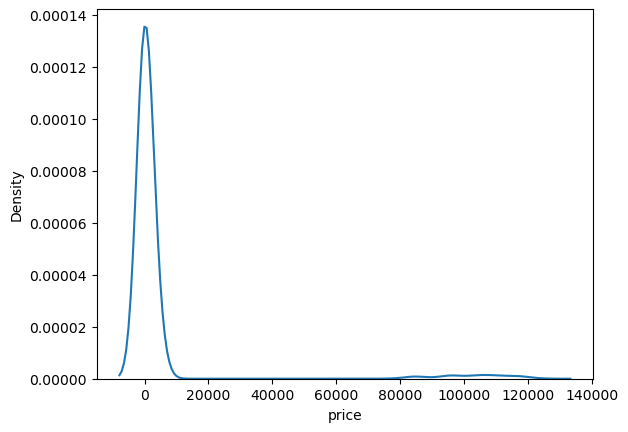

In [37]:
sns.kdeplot(data["price"])

<Axes: ylabel='price'>

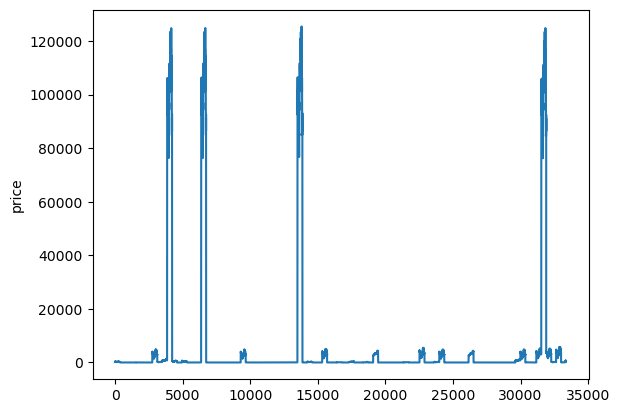

In [10]:
sns.lineplot(data["price"])

<Axes: >

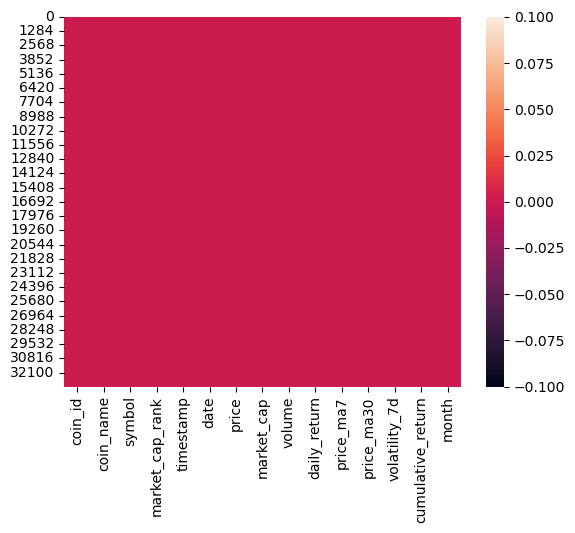

In [28]:
sns.heatmap(data.isnull())

<Axes: >

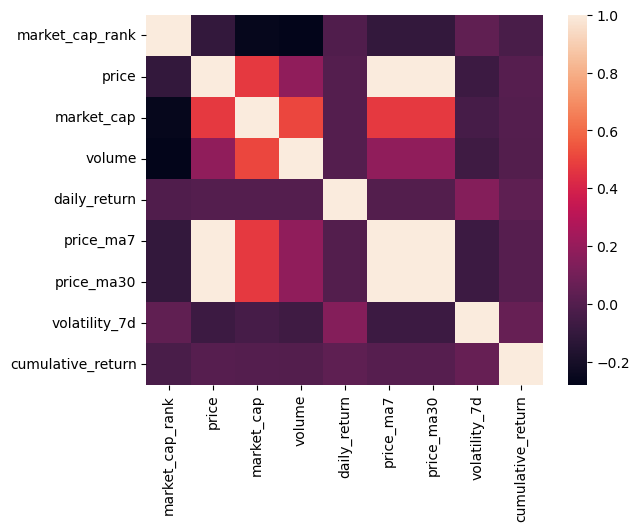

In [29]:
sns.heatmap(numeric_columns.corr())

<h3>Transfering the data from python to MY SQL

In [30]:
pip install psycopg2-binary sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [31]:
!pip install sqlalchemy pymysql

In [32]:
!pip install mysql-connector-python

In [33]:
pip install pymysql sqlalchemy mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [34]:
import mysql.connector as connector
import pandas as pd

In [35]:
from sqlalchemy import create_engine
from urllib.parse import quote_plus

username = "root"
password = quote_plus("atharv@5104")
host = "localhost"
port = "3306"
database = "Crypto_Price_Trend_Analysis"   # 🔥 must exist

engine = create_engine(
    f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}"
)

engine.connect()
print("MySQL connected successfully")

data.to_sql("customer", engine, if_exists="replace", index=False)
print("Table created successfully")

MySQL connected successfully
Table created successfully
